                                      CAR PREDICTION USING PYTHON TASK 2

Import Some Libraries

In [4]:
#importing some libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
# read csv file
df = pd.read_csv("car data.csv")

In [6]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
#drop the column Year
df=df.drop(columns=["Year"])

In [8]:
#define first 5 rows
df.head()

,Car_Name,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [9]:
#find missing values
df.isnull().sum()

Car_Name         0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [10]:
#describe column Selling_Price
df["Selling_Price"].describe()

count    301.000000
mean       4.661296
std        5.082812
min        0.100000
25%        0.900000
50%        3.600000
75%        6.000000
max       35.000000
Name: Selling_Price, dtype: float64

<Axes: ylabel='Frequency'>

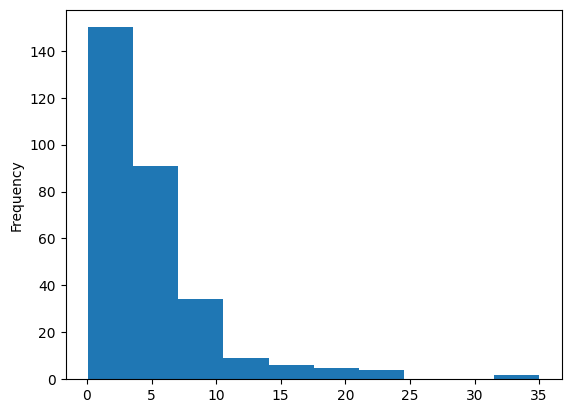

In [11]:
#create a histogram for Selling_Price
df["Selling_Price"].plot.hist()

<Axes: >

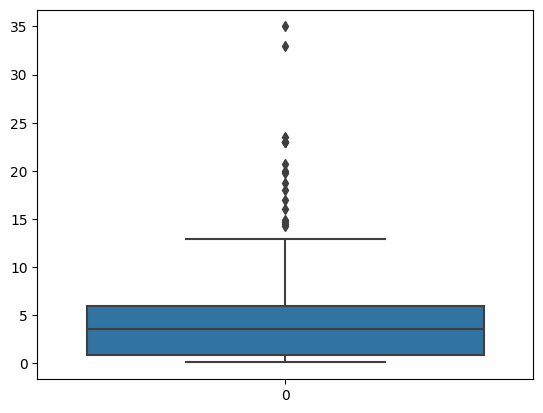

In [12]:
#create a boxplot for Selling_Price
sns.boxplot(df["Selling_Price"])

In [13]:
#calculating the Interquartile Range (IQR) for Selling_Price
q1 = df["Selling_Price"].quantile(0.25)
q3 = df["Selling_Price"].quantile(0.75)
IQR = q3-q1
IQR

5.1

In [14]:
#calculate upper and lower limits
upper_limit = q3+1.5*IQR
lower_limit = q1-1.5*IQR
upper_limit,lower_limit

(13.649999999999999, -6.749999999999999)

In [15]:
# create a custom function
def imputer(value):
    if value<upper_limit:
        return upper_limit
        if value<lower_limit:
            return lower_limit
        else:
            return value

In [16]:
df["Selling_Price"]=df["Selling_Price"].apply(imputer)

In [17]:
#information of column selling _Price
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Selling_Price  284 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Driven_kms     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Selling_type   301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 18.9+ KB


                                        SEPARATING X AND Y 

In [18]:
# separating x and y
x = df.drop(columns=["Selling_Price"])
y = df["Selling_Price"]

In [19]:
# select column with data types
categorical = x.select_dtypes(include=["object"])


                                            DUMMY ENCODING

In [20]:
#performs one-hot encoding on categorical columns in dataframe
dummy = pd.get_dummies(categorical,drop_first=True)
x = x.drop(list(categorical.columns),axis=1)
x = pd.concat([x,dummy],axis=1)

In [21]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(x,y,random_state=101)

In [28]:
from sklearn.tree import DecisionTreeRegressor
y_train.fillna(y_train.mean(), inplace=True)
model = DecisionTreeRegressor()
model.fit(x_train,y_train)
predictions = model.predict(x_test)


In [29]:
from sklearn.metrics import mean_absolute_error

model.score(x_test,predictions)


1.0